In [1]:
import serial
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from numpy.fft import fft
import threading,time, pyaudio

Orthogonal Chirps, Generate and Play Sound

In [2]:
sampling_f = 96e3 #kHz
T_c = 0.01 #chirp duration, ms
t = np.arange(0,T_c,1/sampling_f) #time, between 0 and T_c with steps of whatever 100khz (sample at 100kHz) is
f_s = 20e3 #starting frequency, kHz
f_h = 22e3 #ending frequency, kHz
phi = 0 #initial phase
B = f_h - f_s #bandwidth
mu = B / T_c #chirp rate
BUFFER_SIZE = 4096 #buffer size

In [3]:
#Initial Chirp Function Definition
s_t = np.exp(2j * np.pi * (f_s * t + 1/2 * mu * np.square(t)) + phi)

#plt.plot(t,s_t)
#plt.xlim(0,0.01)
#plt.ylim(-1,1)

In [4]:
#Play Audio
def play_audio(data,player, fs , dev=None):
    
    try:
         ostream.write( data.astype(np.float32))
    except:
         print("oops something went wrong")
        
#p = pyaudio.PyAudio()
#play_audio(np.imag(s_t),p,sampling_f,dev=None)
#play_audio(s_t,p,sampling_f,dev=None)

Print Serial Code

Connected to serial port
Sent character to device. Recording:


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


b'Character detected. Recording\r\n'
b'left\r\n'
b'right\r\n'
b'done \r\n'


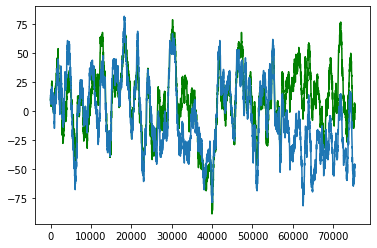

In [5]:
s = serial.Serial('/dev/tty.usbmodem0004401714771')
print("Connected to serial port")

s.flushInput()
s.flushOutput()

#Open audio stream
p = pyaudio.PyAudio()
dev=None
ostream = p.open(format=pyaudio.paFloat32, channels=1, rate=int(sampling_f),output=True,output_device_index=dev)

def plotsound(x,y,a):
    plt.ion()
    plt.plot(x,y, color = "green")
    plt.plot(x,a)
    plt.show()

left = np.zeros(BUFFER_SIZE)
right = np.zeros(BUFFER_SIZE)
sample = np.arange(0,BUFFER_SIZE,1)
time = np.linspace(0,19e6 / 42 / 6,BUFFER_SIZE)
#time = np.linspace(0, 19e6 / 32 / 6 ,BUFFER_SIZE)

In [ ]:
For A single Chirp

In [ ]:
sound = True
s.write(b'r')
print("Sent character to device. Recording:")

play_audio(s_t,p,sampling_f,dev=None)
    
while sound:

    read = s.readline()
    #print("Starting readlines....")
    #print(read)

    try:
        read = read.decode().strip()
    except (UnicodeDecodeError, AttributeError):
        print("Error detected")
        pass
    #print(read)

    if read == "left":
        #print("Left array:\n")
        for i in range(0,BUFFER_SIZE):
            lineL = s.readline().decode().strip()
            if lineL != "right":
                left[i] = lineL
                
    elif read == "right":
        #print("Right array:\n")
        for i in range(0,BUFFER_SIZE):
            lineR = s.readline().decode().strip()
            if lineR != "done":
                right[i] = lineR
    elif read == "done":
        sound = False
        plotsound(time,left,right)

For Continuous Graphing 

In [ ]:
#sound = True

# while 1:
#     r = False
    
#     while sound:

#         read = s.readline()
#         #print("Starting readlines....")
#         #print(read)
    
#         try:
#             read = read.decode().strip()
#         except (UnicodeDecodeError, AttributeError):
#             print("Error detected")
#             pass
#         #print(read)
    
#         if read == "left":
#             #print("Left array:\n")
#             for i in range(0,BUFFER_SIZE-1):
#                 lineL = s.readline().decode().strip()
#                 if lineL == "right":
#                     r = True
#                 else:
#                     left[i] = lineL
#             #print(left)
#         elif read == "right" or r == True:
#             #print("Right array:\n")
#             for i in range(0,BUFFER_SIZE-1):
#                 lineR = s.readline().decode().strip()
#                 if lineR == "done":
#                     r = True
#                 else:
#                     right[i] = lineR
#         elif read == "done":
#             sound = False
#             plotsound(time,left,right)
#     sound = True

In [ ]:
s.close()